In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import test and train data
train = pd.read_csv('/content/drive/MyDrive/Final Project/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Final Project/test.csv')

In [ ]:
# Check for missing values
train.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
test.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146087 entries, 0 to 146086
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      146087 non-null  int64  
 1   Time    146087 non-null  float64
 2   V1      146087 non-null  float64
 3   V2      146087 non-null  float64
 4   V3      146087 non-null  float64
 5   V4      146087 non-null  float64
 6   V5      146087 non-null  float64
 7   V6      146087 non-null  float64
 8   V7      146087 non-null  float64
 9   V8      146087 non-null  float64
 10  V9      146087 non-null  float64
 11  V10     146087 non-null  float64
 12  V11     146087 non-null  float64
 13  V12     146087 non-null  float64
 14  V13     146087 non-null  float64
 15  V14     146087 non-null  float64
 16  V15     146087 non-null  float64
 17  V16     146087 non-null  float64
 18  V17     146087 non-null  float64
 19  V18     146087 non-null  float64
 20  V19     146087 non-null  float64
 21  V20     14

In [ ]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


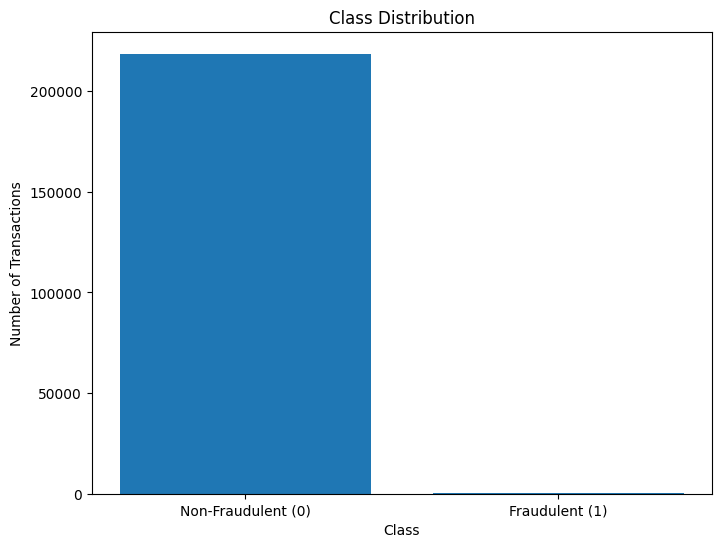

0    218660
1       469
Name: Class, dtype: int64

In [ ]:
# Check the balance of the dataset in terms of the target variable 'Class'
class_distribution = train['Class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values, tick_label=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Class Distribution')
plt.show()

# Show actual numbers
class_distribution

In [ ]:
# Function to manually oversample the minority class
def manual_oversampling(X, y):
    # Identify the minority and majority classes
    class_counts = y.value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()

    # Separate the instances for each class
    indices_majority = y[y == majority_class].index
    indices_minority = y[y == minority_class].index

    # Calculate the number of instances needed for the minority class to match the majority class
    new_instances_count = len(indices_majority) - len(indices_minority)

    # Randomly sample instances from the minority class with replacement
    random_indices = np.random.choice(indices_minority, new_instances_count, replace=True)

    # Concatenate the original majority class instances with the newly sampled minority class instances
    over_sample_indices = np.concatenate([indices_majority, random_indices])

    # Create the new resampled dataset
    X_resampled = X.loc[over_sample_indices]
    y_resampled = y.loc[over_sample_indices]

    return X_resampled, y_resampled

In [ ]:
# Define features (X) and target (y)
X = train.drop(['Class'], axis=1)
y = train['Class']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply manual oversampling to the training data
X_resampled, y_resampled = manual_oversampling(X_train, y_train)

# Check the class distribution after manual oversampling
y_resampled.value_counts()

0    174928
1    174553
Name: Class, dtype: int64

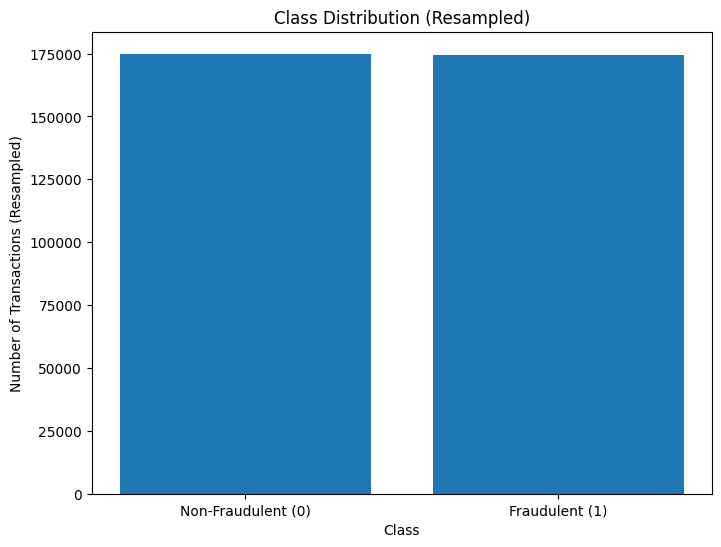

0    174928
1    174553
Name: Class, dtype: int64

In [ ]:
# now graphing after doing the oversampling of the minority class

# Check the balance of the dataset in terms of the target variable 'Class'
class_distribution = y_resampled.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values, tick_label=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions (Resampled)')
plt.title('Class Distribution (Resampled)')
plt.show()

# Show actual numbers
class_distribution

In [ ]:
scaler = StandardScaler()

features_to_scale = ['Amount', 'Time']
X_resampled[features_to_scale] = scaler.fit_transform(X_resampled[features_to_scale])
X_val[features_to_scale] = scaler.transform(X_val[features_to_scale])

X_resampled.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
66168,66168,-0.491263,1.328027,-0.834291,1.460012,-0.254868,-2.016828,-0.648979,-1.057908,-0.049669,...,-0.328602,-0.362225,-0.296447,0.078176,0.996681,0.138968,1.040925,0.025433,0.013988,-0.271640
31817,31817,-1.013669,1.475582,-1.253701,0.118830,-1.527091,-1.261480,-0.097879,-1.166640,-0.011299,...,-0.353549,-0.402718,-0.908749,0.012909,-1.098195,0.203058,-0.307438,0.038285,0.027908,-0.094466
106252,106252,-0.089977,0.633178,-1.933071,0.054424,-0.531659,-1.064793,0.582089,-0.504766,0.156095,...,0.822162,0.183730,-0.310433,-0.391889,-0.271798,0.257681,-0.339552,-0.037773,0.067160,1.023125
186526,186526,0.691406,-2.152501,2.160983,-0.006460,0.136668,-1.095000,-1.242840,-0.416178,1.238896,...,0.080687,-0.226989,-0.795226,0.167238,0.333601,0.026946,0.085049,0.109565,0.010878,-0.266015
64879,64879,-0.498684,1.121059,-0.269381,1.091644,1.676064,-0.726693,0.589878,-0.564373,0.264278,...,-0.163906,-0.332969,-0.585545,-0.061567,-0.146816,0.551670,-0.455530,0.077517,0.020895,-0.221421


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model using the resampled and scaled training data
dt_clf.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_val_pred_dt = dt_clf.predict(X_val)

# Evaluate the model's performance using Decision Tree
conf_matrix_dt = confusion_matrix(y_val, y_val_pred_dt)
class_report_dt = classification_report(y_val, y_val_pred_dt, target_names=['Non-Fraudulent', 'Fraudulent'])

print(class_report_dt)

                precision    recall  f1-score   support

Non-Fraudulent       1.00      1.00      1.00     43732
    Fraudulent       0.01      0.01      0.01        94

      accuracy                           1.00     43826
     macro avg       0.50      0.50      0.50     43826
  weighted avg       1.00      1.00      1.00     43826



In [ ]:

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model using the resampled and scaled training data
dt_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_dt = dt_clf.predict(X_val)

# Evaluate the model's performance using Decision Tree
conf_matrix_dt = confusion_matrix(y_val, y_val_pred_dt)
class_report_dt = classification_report(y_val, y_val_pred_dt, target_names=['Non-Fraudulent', 'Fraudulent'])

print(class_report_dt)

                precision    recall  f1-score   support

Non-Fraudulent       1.00      0.99      0.99     43732
    Fraudulent       0.03      0.13      0.05        94

      accuracy                           0.99     43826
     macro avg       0.51      0.56      0.52     43826
  weighted avg       1.00      0.99      0.99     43826



In [ ]:
# Importing NumPy for numerical operations
import numpy as np
import pandas as pd  # Importing Pandas for data manipulation

# Function to calculate entropy of a dataset with target column `target_col`
def entropy(target_col):
    value_counts = target_col.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts))

# Function to predict a single instance using the trained tree
def predict_instance(row, tree):
    while isinstance(tree, dict):
        feature = list(tree.keys())[0]
        value = row[feature]
        tree = tree[feature].get(value, None)
        if tree is None:
            return None
    return tree

# Custom classification report
def classification_report_custom(y_true, y_pred, target_names=['Non-Fraudulent', 'Fraudulent']):
    cm = confusion_matrix(y_true, y_pred)
    total = np.sum(cm, axis=1)
    precision = cm.diagonal() / (np.sum(cm, axis=0) + 1e-10)  # added small value to prevent division by zero
    recall = cm.diagonal() / total
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)  # added small value to prevent division by zero
    support = total
    for i, label in enumerate(target_names):
        print(f"{label:<15} {precision[i]:.2f} {recall[i]:.2f} {f1_score[i]:.2f} {support[i]}")
    print("\n")

# Function to get the majority class of the target attribute
def get_majority_class(tree, feature):
    if not isinstance(tree, pd.DataFrame):
        tree = pd.DataFrame(tree)
    if feature in tree.columns:
        return tree[feature].value_counts().idxmax()
    return None

# Function to calculate majority error of a dataset with target column `target_col`
def majority_error(target_col):
    value_counts = target_col.value_counts(normalize=True)
    return 1 - np.max(value_counts)

# Function to calculate Gini index of a dataset with target column `target_col`
def gini_index(target_col):
    counts = target_col.value_counts()
    probabilities = counts / len(target_col)
    return 1 - np.sum(probabilities**2)

# Function to calculate information gain when splitting dataset by `split_attribute_name`
def info_gain(data, split_attribute_name, target_name, criterion="entropy"):
    criterion_map = {
        "entropy": entropy,
        "majority_error": majority_error,
        "gini_index": gini_index
    }
    if criterion not in criterion_map:
        raise ValueError("Invalid criterion provided")

    total_impurity = criterion_map[criterion](data[target_name])

    weighted_impurity = 0
    for value, group in data.groupby(split_attribute_name):
        weighted_impurity += (len(group) / len(data)) * criterion_map[criterion](group[target_name])

    return total_impurity - weighted_impurity

# ID3 Algorithm Implementation
def ID3_numeric(data, original_data, features, target_attribute_name="y", parent_node_class=None,
                max_depth=None, depth=0, criterion="entropy"):
    unique_targets = np.unique(data[target_attribute_name])
    if len(unique_targets) == 1:
        return unique_targets[0]

    if len(data) == 0:
        return get_majority_class(original_data, target_attribute_name)

    if len(features) == 0 or (max_depth and depth == max_depth):
        return parent_node_class

    parent_node_class = get_majority_class(data, target_attribute_name)

    gains = [info_gain(data, feature, target_attribute_name, criterion) for feature in features]
    best_feature = features[np.argmax(gains)]

    tree = {best_feature: {}}

    for value in np.unique(data[best_feature]):
        best_val = data[best_feature] == value
        sub_data = data.where(best_val).dropna()
        remaining_features = [feat for feat in features if feat != best_feature]
        subtree = ID3_numeric(
            data=sub_data,
            original_data=original_data,
            features=remaining_features,
            target_attribute_name=target_attribute_name,
            parent_node_class=parent_node_class,
            max_depth=max_depth,
            depth=depth + 1,
            criterion=criterion
        )
        tree[best_feature][value] = subtree

    return tree


# Binning the features for training
num_bins = 10  # Number of bins for each feature
binned_X_resampled = pd.DataFrame()
for col in X_resampled.columns:
    binned_X_resampled[col] = pd.cut(X_resampled[col], bins=num_bins, labels=False)

# Convert target to integer type
y_resampled_int = y_resampled.astype(int)

# Prepare the whole dataset
id3_data = pd.concat([binned_X_resampled, y_resampled_int], axis=1)

# Run ID3 algorithm
id3_tree = ID3_numeric(
    data=id3_data,
    original_data=id3_data,
    features=binned_X_resampled.columns.tolist(),
    target_attribute_name="Class",
    max_depth=5
)

binned_X_val = pd.DataFrame()
for col in X_val.columns:
    binned_X_val[col] = pd.cut(X_val[col], bins=num_bins, labels=False)

from sklearn.metrics import confusion_matrix

# Make predictions on the validation set
predictions = binned_X_val.apply(lambda row: predict_instance(row, id3_tree), axis=1).fillna(0).astype(int)

# Output custom classification report
print("Class           Precision Recall F1-Score Support")
classification_report_custom(y_val, predictions)

Class           Precision Recall F1-Score Support
Non-Fraudulent  1.00 0.97 0.98 43732
Fraudulent      0.00 0.02 0.00 94




In [ ]:
# Binning the features for training
num_bins = 10  # Number of bins for each feature
binned_X = pd.DataFrame()
for col in X_train.columns:
    binned_X[col] = pd.cut(X_train[col], bins=num_bins, labels=False)

# Convert target to integer type
y_int = y.astype(int)

# Prepare the whole dataset
id3_data = pd.concat([binned_X, y_int], axis=1)

# Run ID3 algorithm
id3_tree = ID3_numeric(
    data=id3_data,
    original_data=id3_data,
    features=binned_X.columns.tolist(),
    target_attribute_name="Class",
    max_depth=5
)

binned_X_val = pd.DataFrame()
for col in X_val.columns:
    binned_X_val[col] = pd.cut(X_val[col], bins=num_bins, labels=False)

from sklearn.metrics import confusion_matrix

# Make predictions on the validation set
predictions = binned_X_val.apply(lambda row: predict_instance(row, id3_tree), axis=1).fillna(0).astype(int)

# Output custom classification report
print("Class           Precision Recall F1-Score Support")
classification_report_custom(y_val, predictions)

Class           Precision Recall F1-Score Support
Non-Fraudulent  1.00 0.99 0.99 43732
Fraudulent      0.01 0.03 0.01 94


